In [1]:
# ライブラリのインポート
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# 住宅価格データセットの読み込み
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')

df.columns=['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# 先頭5行の表示
pd.DataFrame(df.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
# 全ての特徴量を選択
X=df.iloc[:, 0:13].values
# 正解に住宅価格(MDEV)を設定
y = df['MEDV'].values

# 特徴量と正解の先頭3行を表示
X[:3], y[:3]

(array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
         6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
         1.5300e+01, 3.9690e+02, 4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
         6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
         1.7800e+01, 3.9690e+02, 9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
         7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
         1.7800e+01, 3.9283e+02, 4.0300e+00]]), array([24. , 21.6, 34.7]))

In [4]:
# sklearnのデータセットを使用する場合はコメントアウト
#from sklearn.datasets import load_boston
#boston = load_boston()
#X = boston.data
#y = boston.target
#X[:3], y[:3]

In [5]:
# 特徴量と正解を訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('X_trainの形状：',X_train.shape,' y_trainの形状：',y_train.shape,' X_testの形状：',X_test.shape,' y_testの形状：',y_test.shape)

X_trainの形状： (404, 13)  y_trainの形状： (404,)  X_testの形状： (102, 13)  y_testの形状： (102,)


In [6]:
# 特徴量の標準化
sc = StandardScaler()
# 訓練データを変換器で標準化
X_train_std = sc.fit_transform(X_train)
# テストデータを作成した変換器で標準化
X_test_std = sc.transform(X_test)
# 標準化された訓練データ
X_train_std[0]

array([-0.37257438, -0.49960763, -0.70492455,  3.66450153, -0.42487874,
        0.93567804,  0.69366877, -0.4372179 , -0.16224243, -0.56165616,
       -0.48463784,  0.3716906 , -0.41100022])

In [7]:
# 標準化後の特徴量をNumpyからPandasに変換し表示
df_X_std = pd.DataFrame(X_train_std)
# ヘッダの追加
df_X_std.columns=['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# 先頭5行の表示
pd.DataFrame(df_X_std.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.372574,-0.499608,-0.704925,3.664502,-0.424879,0.935678,0.693669,-0.437218,-0.162242,-0.561656,-0.484638,0.371691,-0.411000
1,-0.397099,-0.499608,-0.044878,-0.272888,-1.241859,-0.491181,-1.835528,0.730055,-0.624648,-0.573376,0.336491,0.205012,-0.387681
2,-0.402693,0.771168,-0.886760,-0.272888,-1.111490,0.857849,-0.524621,1.234769,-0.393445,-0.602677,-0.849584,0.366609,-0.181919
3,-0.405769,0.029882,-0.465819,-0.272888,-0.277127,-0.417676,-0.086464,0.861527,-0.509046,-0.538216,-1.488240,0.415732,-0.037886
4,2.774932,-0.499608,0.998884,-0.272888,1.070021,-1.438097,0.715042,-1.021528,1.687378,1.542121,0.792674,-2.613393,1.911362


In [8]:
# 線形回帰モデルを作成
model = LinearRegression()
# モデルの訓練
model.fit(X_train_std, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
# パラメータベクトルを表示し、符号が正の特徴量は価格の上昇要因となり、負の特徴量は下落要因
print('傾き:', model.coef_)
# バイアスのパラメータ
print('切片:', model.intercept_) 

傾き: [-0.97082019  1.05714873  0.03831099  0.59450642 -1.8551476   2.57321942
 -0.08761547 -2.88094259  2.11224542 -1.87533131 -2.29276735  0.71817947
 -3.59245482]
切片: 22.611881188118836


In [10]:
# 特徴量の列テキスト表示
X_columns = df.columns[0:13]
X_columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

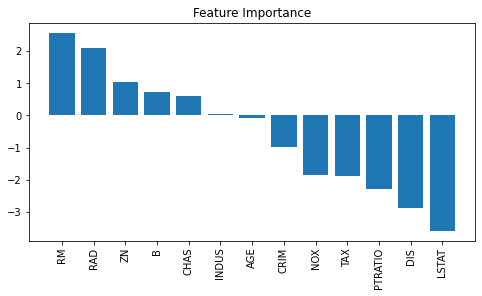

In [11]:
# 特徴量重要性を計算
importances = model.coef_

# 特徴量重要性を降順にソート
indices = np.argsort(importances)[::-1]

# 特徴量の名前を、ソートした順に並び替え
names = [X_columns[i] for i in indices]

# 傾きのパラメータを用いて、住宅価格に影響を及ぼす特徴量を可視化
# RM(平均部屋数)は住宅価格上昇の影響を及ぼし、LSTAT（低所得者の割合）は下落の影響を及ぼす
plt.figure(figsize=(8,4)) #プロットのサイズ指定
plt.title("Feature Importance") # プロットのタイトルを作成
plt.bar(range(df.iloc[:, 1:].shape[1]), importances[indices]) # 棒グラフを追加
plt.xticks(range(df.iloc[:, 1:].shape[1]), names, rotation=90) # X軸に特徴量の名前を追加

plt.show() # プロットを表示

In [12]:
# 訓練データ、テストデータの住宅価格を予測
y_train_pred = model.predict(X_train_std)
y_test_pred = model.predict(X_test_std)

# 正解の住宅価格と予測の住宅価格のMSEを計算
print('MSE train: %.2f, test: %.2f' % (
    np.mean((y_train - y_train_pred) ** 2),
    np.mean((y_test - y_test_pred) ** 2)))

MSE train: 19.33, test: 33.45


In [13]:
# MSEの計算
print('MSE train: %.2f, test: %.2f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

MSE train: 19.33, test: 33.45


In [14]:
# 推論の先頭10件を表示
y_test_pred[:10]

array([24.88963777, 23.72141085, 29.36499868, 12.12238621, 21.44382254,
       19.2834443 , 20.49647539, 21.36099298, 18.8967118 , 19.9280658 ])

In [15]:
# 正解の先頭10件を表示
y_test[:10]

array([22.6, 50. , 23. ,  8.3, 21.2, 19.9, 20.6, 18.7, 16.1, 18.6])

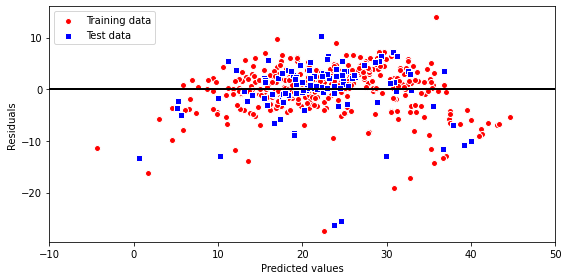

In [16]:
# 残差プロット
plt.figure(figsize=(8,4)) #プロットのサイズ指定

plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='red', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='blue', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()

plt.show()